In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc
from scipy.integrate import trapz
%matplotlib inline
from astropy import units

from astropy import constants
constants.N_A.si.value

In [2]:
rc('font', family='Comic Sans MS')

In [4]:
dane = pd.read_csv('bateria_1.txt', sep=r"\s*", skiprows=1, header=None, encoding='ANSI',decimal=',')
dane.columns = ['t[s]','U[V]']
dane

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\parsers.py:2138: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\parsers.py:2140: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


,t[s],U[V]
0,0.1872,4.0629
1,1.0139,4.0576
2,1.8875,4.0524
3,2.8077,4.0471
4,3.8219,4.0418
5,4.8672,4.0366
6,5.9589,4.0313
7,7.0353,4.0261
8,8.1272,4.0208
9,9.2660,4.0156


In [32]:
I = 59.8e-6 # w A
m = 3.531e-6 # w kgramach
pojemnosc = I*dane['t[s]']/m/3600

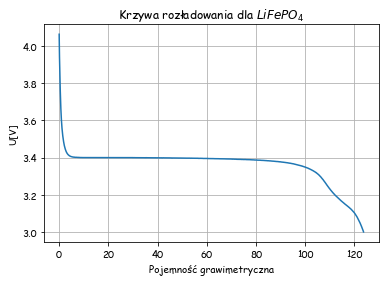

In [35]:
plt.plot(pojemnosc,dane['U[V]'])
plt.grid()
plt.xlabel('Pojemność grawimetryczna')
plt.ylabel('U[V]')
plt.title(r'Krzywa rozładowania dla $LiFePO_4$')
plt.savefig('Krzywa_rozladowania.png',dpi=400)

In [38]:
#Pojemność grawimetryczna
pojemnosc_doswiadczalna = trapz(dane['U[V]'],pojemnosc)
e = constants.e.value
N_A = constants.N_A.value
M_Li = 6.941 
M_Fe = 55.845
M_O = 15.999
M_P = 30.973762
M = M_Li + M_Fe + M_P + 4*M_O
Q = N_A*e/M
pojemnosc_teoretyczna = Q
print('Pojemność:')
print(f'-doświadczalna = {pojemnosc_doswiadczalna}')
print(f'-teoretyczna   = {pojemnosc_teoretyczna}')
pojemnosc_doswiadczalna/pojemnosc_teoretyczna

Pojemność:
-doświadczalna = 415.82436707897205
-teoretyczna   = 611.6120999909897


0.67988250573377795

6.022140857e+23